## PS2-1 Convexity of Generalized Linear Models

#### (a)

Output:

```
==== Training model on data set A ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Converged in 30395 iterations
==== Training model on data set B ====
Finished 10000 iterations
Finished 20000 iterations
Finished 30000 iterations
Finished 40000 iterations
Finished 50000 iterations
Finished 60000 iterations
Finished 70000 iterations
Finished 80000 iterations
Finished 90000 iterations
Finished 100000 iterations
...
...
```

The algorithm converges on dataset A, but not on B.

#### (b)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import src.util as util

In [3]:
x_train_a, y_train_a = util.load_csv('data/ds1_a.csv', add_intercept=True)
x_train_b, y_train_b = util.load_csv('data/ds1_b.csv', add_intercept=True)

In [4]:
def plot(x, y, title):
    plt.figure()
    plt.plot(x[y == 1, -2], x[y == 1, -1], 'bx', linewidth=2)
    plt.plot(x[y == -1, -2], x[y == -1, -1], 'go', linewidth=2)
    plt.suptitle(title, fontsize=12)

Plot dataset A and B:

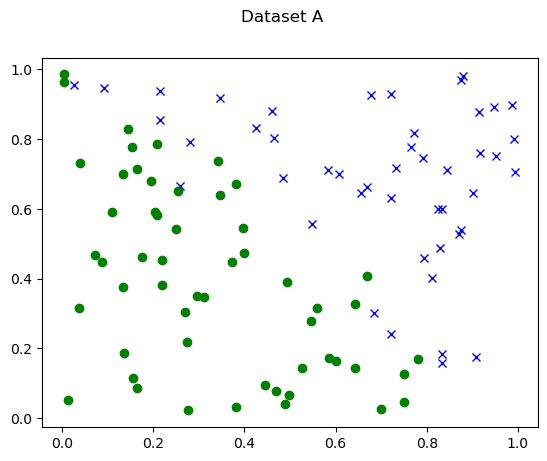

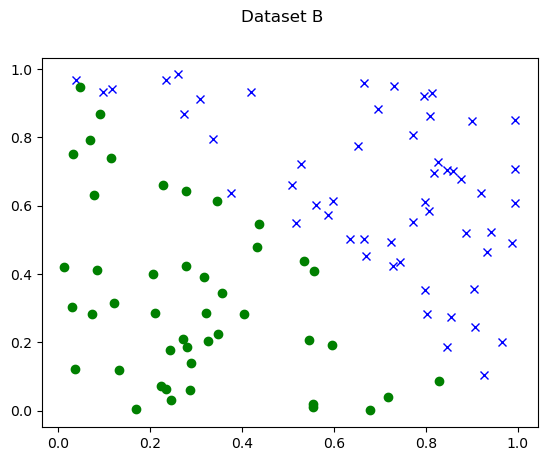

In [5]:
plot(x_train_a, y_train_a, 'Dataset A')
plot(x_train_b, y_train_b, 'Dataset B')


At first glance, the only difference between the two datasets seems to be that dataset B is linearly separable, whereas dataset A is not.

From the code:

```python
def calc_grad(X, Y, theta):
    """Compute the gradient of the loss with respect to theta."""
    m, n = X.shape

    margins = Y * X.dot(theta)
    probs = 1. / (1 + np.exp(margins))
    grad = -(1./m) * (X.T.dot(probs * Y))

    return grad


def logistic_regression(X, Y):
    """Train a logistic regression model."""
    m, n = X.shape
    theta = np.zeros(n)
    learning_rate = 10

    i = 0
    while True:
        i += 1
        prev_theta = theta
        grad = calc_grad(X, Y, theta)
        theta = theta - learning_rate * grad
        if i % 10000 == 0:
            print('Finished %d iterations' % i)
        if np.linalg.norm(prev_theta - theta) < 1e-15:
            print('Converged in %d iterations' % i)
            break
    return
```

we can see that the gradient of the cost function is

$$\nabla_\theta J(\theta) = - \frac{1}{m} \sum_{i = 1}^{m} \frac{y^{(i)} x^{(i)}}{1 + \exp (y^{(i)} \theta^T x^{(i)})}$$

which means that the gradient descent algorithm is trying to minimize

$$\ell (\theta) = - \frac{1}{m} \sum_{i = 1}^{m} \log \frac{1}{1 + \exp (-y^{(i)} \theta^T x^{(i)})}$$

If a dataset is completely linearly separable, i.e. $\forall i \in \{1, \dots, m \}, \ y^{(i)} \theta^T x^{(i)} > 0$,
then, by multiplying a larger positive scalar, there will always be a new $\theta$ that makes $\ell (\theta)$ even smaller,
which prevents the algorithm from converging. However, if the dataset is not linearly separable, $\theta$ cannot be generated
in such way while minimizing $\ell (\theta)$.

#### (c)

##### i.

No. A different fixed learning rate is only a scalar for $\nabla_\theta J(\theta)$.

##### ii.

Yes. By decreasing the learning rate over time, the algorithm will eventually find some $\theta$ whose change is small enough
to meet the stop criterion.

##### iii.

No. Linear scaling of the input features can be treated as a scalar applied to $\theta$.

##### iv.

Yes. An L2 regularization term can keep $\theta$ from arbitrarily scaling.

##### v.

Yes. Adding zero-mean Gaussian noise to the training data or labels helps so long as the dataset is not linearly separable.

#### (d)

No. SVM with hinge loss is not vulnerable to linearly separable datasets.

If the dataset is linearly separable, the hinge loss will be minimized to 0, and the algorithm then stops.